<a href="https://colab.research.google.com/github/KazumaShachou/DataScience/blob/master/Pandas_DataManipulation_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Vectorized String Operations

In [69]:
import pandas as pd
import numpy as np

In [70]:
x = np.array([2, 5, 6, 7, 3, 12])
x * 2

array([ 4, 10, 12, 14,  6, 24])

In [71]:
#vectorization , it' works
data = ['Pekora', 'Watame', 'Rushia', 'Okayuu']
[s.capitalize() for s  in data]

['Pekora', 'Watame', 'Rushia', 'Okayuu']

In [72]:
#but in this case not work
#data = ['Pekora','Watame',None , 'Rushia', 'Okayuu']
#[s.capitalize() for s in data]
#this work just if I use the command  "data" 

In [73]:
#use pandas 
names =   pd.Series(data)
names

0    Pekora
1    Watame
2    Rushia
3    Okayuu
dtype: object

In [74]:
names.str.capitalize()

0    Pekora
1    Watame
2    Rushia
3    Okayuu
dtype: object

In [75]:
#Tables of Pandas String Methods

vtubers = pd.Series(['Usada Pekora', 'Nekomata Okayuu', 'Inukami Korone', ' Murasaki Shion', 'Uruha Rushia', 'Sakura Miko'])
vtubers

0       Usada Pekora
1    Nekomata Okayuu
2     Inukami Korone
3     Murasaki Shion
4       Uruha Rushia
5        Sakura Miko
dtype: object

In [76]:
vtubers.str.lower()

0       usada pekora
1    nekomata okayuu
2     inukami korone
3     murasaki shion
4       uruha rushia
5        sakura miko
dtype: object

In [77]:
vtubers.str.cat()

'Usada PekoraNekomata OkayuuInukami Korone Murasaki ShionUruha RushiaSakura Miko'

In [78]:
vtubers.str.len()

0    12
1    15
2    14
3    15
4    12
5    11
dtype: int64

In [79]:
vtubers.str.title()

0       Usada Pekora
1    Nekomata Okayuu
2     Inukami Korone
3     Murasaki Shion
4       Uruha Rushia
5        Sakura Miko
dtype: object

In [80]:
vtubers.str.capitalize()

0       Usada pekora
1    Nekomata okayuu
2     Inukami korone
3     murasaki shion
4       Uruha rushia
5        Sakura miko
dtype: object

In [81]:
vtubers.str.startswith('U')

0     True
1    False
2    False
3    False
4     True
5    False
dtype: bool

In [82]:
vtubers.str.split()

0       [Usada, Pekora]
1    [Nekomata, Okayuu]
2     [Inukami, Korone]
3     [Murasaki, Shion]
4       [Uruha, Rushia]
5        [Sakura, Miko]
dtype: object

In [83]:
#extract the first name
vtubers.str.extract('([A-Za-z]+)')

,0
0,Usada
1,Nekomata
2,Inukami
3,Murasaki
4,Uruha
5,Sakura


In [84]:
#all names that start and end with a consonant
vtubers.str.findall(r'^[^AEIOU].*[^aiueo]$')

0                   []
1                   []
2                   []
3    [ Murasaki Shion]
4                   []
5                   []
dtype: object

In [85]:
#all names that start with consonant and end with vogal
vtubers.str.findall(r'^[^AEIOU].*[aiueo]$')


0                   []
1    [Nekomata Okayuu]
2                   []
3                   []
4                   []
5        [Sakura Miko]
dtype: object

In [86]:
#all names that start and end with vogal
vtubers.str.findall(r'^[AEIOU].*[aiueo]$')

0      [Usada Pekora]
1                  []
2    [Inukami Korone]
3                  []
4      [Uruha Rushia]
5                  []
dtype: object

In [87]:
#Vectorized item access and slicing
vtubers.str[0:3]

0    Usa
1    Nek
2    Inu
3     Mu
4    Uru
5    Sak
dtype: object

In [88]:
#extract the last name of each entry
vtubers.str.split().str.get(-1)

0    Pekora
1    Okayuu
2    Korone
3     Shion
4    Rushia
5      Miko
dtype: object

In [89]:
vtubers.str.get(-1)

0    a
1    u
2    e
3    n
4    a
5    o
dtype: object

In [90]:
full_vtubers = pd.DataFrame({'name': vtubers,
'info': ['Comedian | nice person', 'Kind | nice voice', 'crazy  funny', 'funny | lazy', 'Yandere | kawaii',
'Elite | Elite']})

full_vtubers

,name,info
0,Usada Pekora,Comedian | nice person
1,Nekomata Okayuu,Kind | nice voice
2,Inukami Korone,crazy funny
3,Murasaki Shion,funny | lazy
4,Uruha Rushia,Yandere | kawaii
5,Sakura Miko,Elite | Elite


In [91]:
# bin where 0 true and 1 is false
full_vtubers['info'].str.get_dummies('|')

,Elite,kawaii,lazy,nice person,nice voice,Comedian,Elite,Kind,Yandere,crazy funny,funny
0,0,0,0,1,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,1,0,0
5,1,0,0,0,0,0,1,0,0,0,0


## Working with Time Series

In [92]:
from datetime import datetime
import pandas as pd
date = datetime(year = 2020, month = 11, day = 1)
date

datetime.datetime(2020, 11, 1, 0, 0)

In [93]:
date.strftime('%A')

'Sunday'

In [94]:
import numpy as np
date = np.array('2020-11-01', dtype = np.datetime64)
date

array('2020-11-01', dtype='datetime64[D]')

In [95]:
#vectorized operations
date + np.arange(12)

array(['2020-11-01', '2020-11-02', '2020-11-03', '2020-11-04',
       '2020-11-05', '2020-11-06', '2020-11-07', '2020-11-08',
       '2020-11-09', '2020-11-10', '2020-11-11', '2020-11-12'],
      dtype='datetime64[D]')

In [96]:
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

In [97]:
np.datetime64('2015-07-04 12:00', 'ns')

numpy.datetime64('2015-07-04T12:00:00.000000000')

In [98]:
#Pandas Time Series: Indexing by Time
import pandas as pd
index = pd.DatetimeIndex(['2015-09-11', '2015-10-12',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0,1,2,3], index = index)
data

2015-09-11    0
2015-10-12    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [99]:
data['2015-09-11' : '2015-07-04']

Series([], dtype: int64)

In [100]:
data['2015']

2015-09-11    0
2015-10-12    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [101]:
dates = pd.to_datetime([datetime(2015,7,3), '4 of July, 2015',
                        '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [102]:
#indicate daily frequency

dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [103]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [104]:
#pd.date_range() accepts a start date, an end date
pd.date_range('2015-07-03', '2015-07-15')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
               '2015-07-11', '2015-07-12', '2015-07-13', '2015-07-14',
               '2015-07-15'],
              dtype='datetime64[ns]', freq='D')

In [105]:
pd.date_range('2015-07-03', periods = 10)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
               '2015-07-11', '2015-07-12'],
              dtype='datetime64[ns]', freq='D')

In [106]:
#freque in hours 
pd.date_range('2015-07-03', periods = 12, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00',
               '2015-07-03 08:00:00', '2015-07-03 09:00:00',
               '2015-07-03 10:00:00', '2015-07-03 11:00:00'],
              dtype='datetime64[ns]', freq='H')

In [107]:
#months
pd.date_range('2015-07-03', periods = 6, freq= 'M' )

DatetimeIndex(['2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
               '2015-11-30', '2015-12-31'],
              dtype='datetime64[ns]', freq='M')

In [108]:
#in hours using delta
pd.timedelta_range(0, periods = 12, freq= 'H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00', '0 days 10:00:00', '0 days 11:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [109]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [110]:
from pandas_datareader import data
yah = data.DataReader('GOOG', start='2004', end='2020', data_source='yahoo')
yah.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


In [111]:
yah = yah['Close']

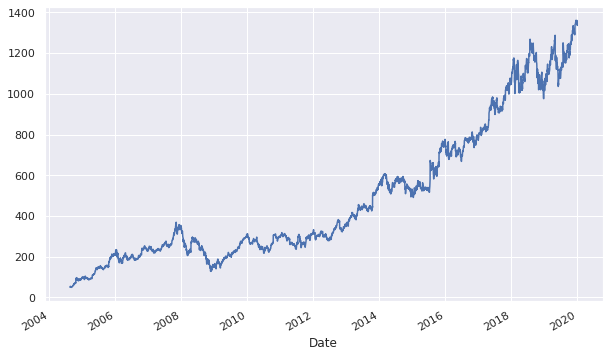

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
yah.plot(figsize = (10,6));

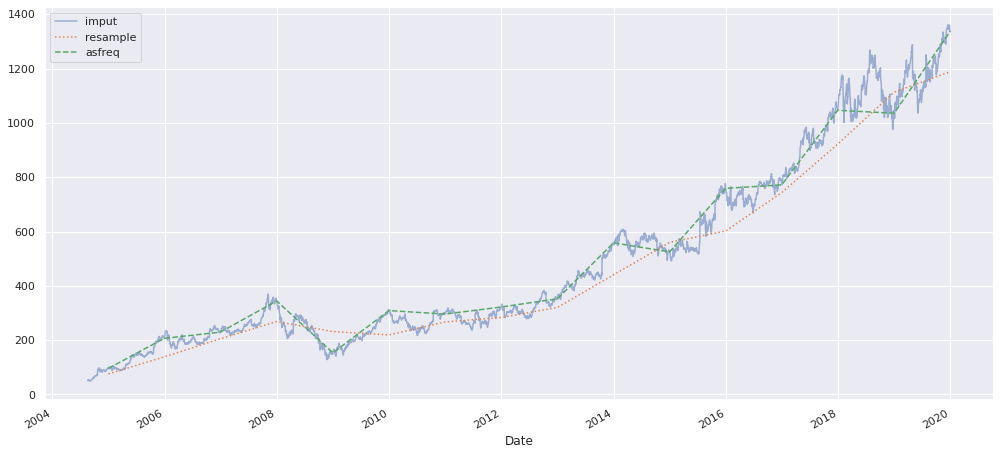

In [113]:
#Resampling and converting frequencies
yah.plot(alpha = 0.5, style = '-', figsize= (17,8))
yah.resample('BA').mean().plot(style = ':', figsize= (17,8))
yah.asfreq('BA').plot(style = '--', figsize= (17,8))
plt.legend(['imput','resample', 'asfreq'],
           loc = 'upper left');

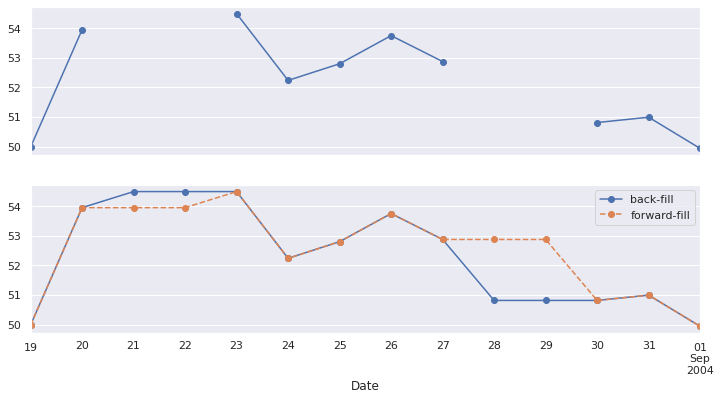

In [114]:
#resample the business day
fig, ax = plt.subplots(2, sharex=True)
data = yah.iloc[:10]

data.asfreq('D').plot(ax = ax[0], marker = 'o')

data.asfreq('D', method = 'bfill').plot(ax = ax[1], style = '-o', figsize= (12,6))
data.asfreq('D', method = 'ffill').plot(ax = ax[1], style = '--o', figsize= (12,6))
ax[1].legend(['back-fill', 'forward-fill']);

In [ ]:
#Time-shifts
fig, ax = plt.subplots(3, sharey=True)
# apply a frequency to the data
goog = goog.asfreq('D', method='pad')
goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])
# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')
ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')
ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')
ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');
plt.figure(figsize = (10,10));